<a href="https://colab.research.google.com/github/Angsumi/NE-Ethnomedicine/blob/main/Copy_of_NE_ethno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

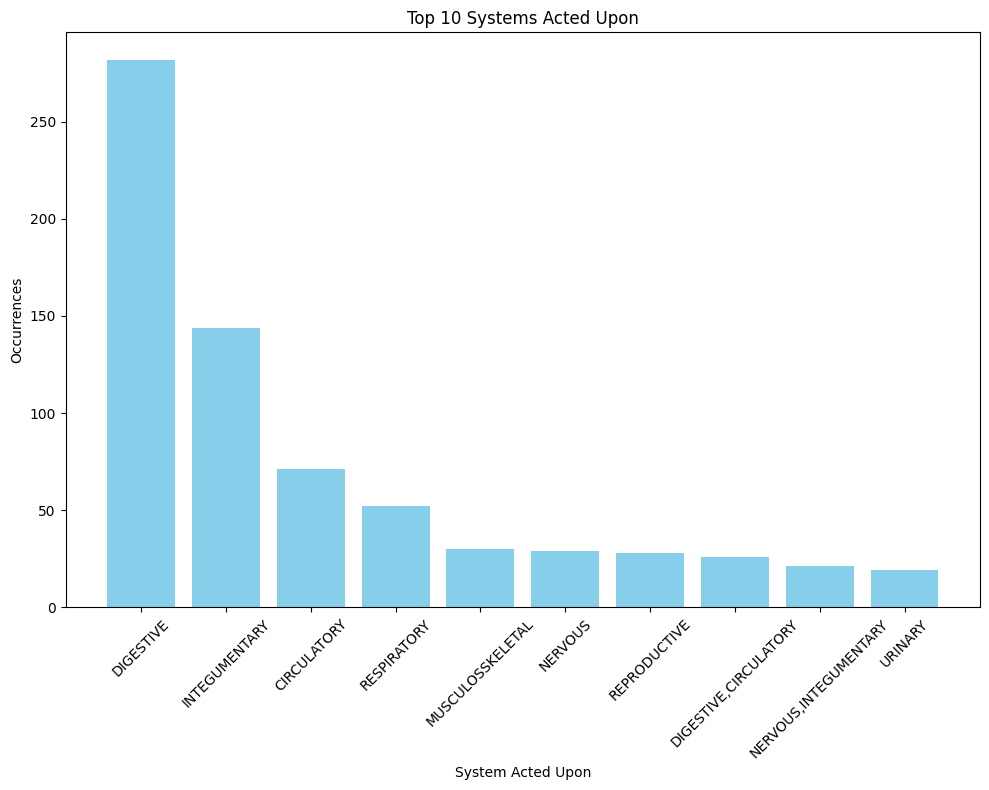

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from google.colab import files

# Load the dataset (assuming the file path is known)
df_modified = pd.read_excel('/content/NE5.xlsx')

# Count occurrences for "System Acted Upon" and "Family Name"
words_occurrence_modified_correct = Counter(df_modified['ActedUpon'].dropna())
family_counts_corrected = Counter(df_modified['Family Name'].dropna())
Tribe_count = Counter(df_modified['Tribe'])

# 1. Bar Plot of Top 10 Systems Acted Upon
top_10_systems = words_occurrence_modified_correct.most_common(10)
systems, system_counts = zip(*top_10_systems)

plt.figure(figsize=(10, 8))
plt.bar(systems, system_counts, color='skyblue')
plt.xlabel('System Acted Upon')
plt.ylabel('Occurrences')
plt.title('Top 10 Systems Acted Upon')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the figure
plt.savefig('plot1.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot1.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

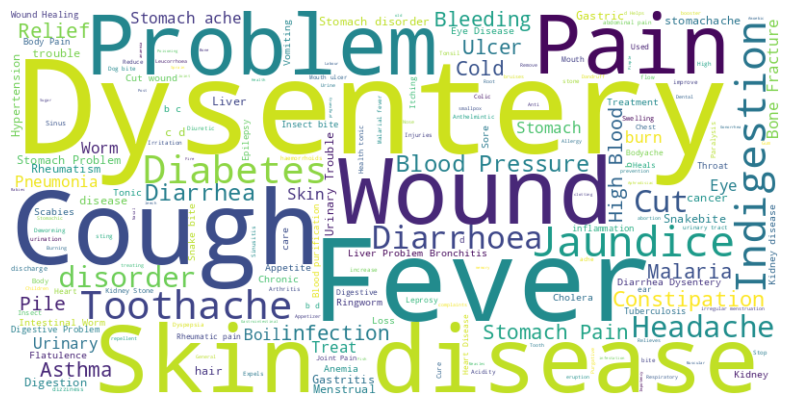

In [2]:

# 2. Word Cloud for Diseases Treated
disease_text = ' '.join(df_modified['Disease'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disease_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Save the figure
plt.savefig('plot2.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot2.png')

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

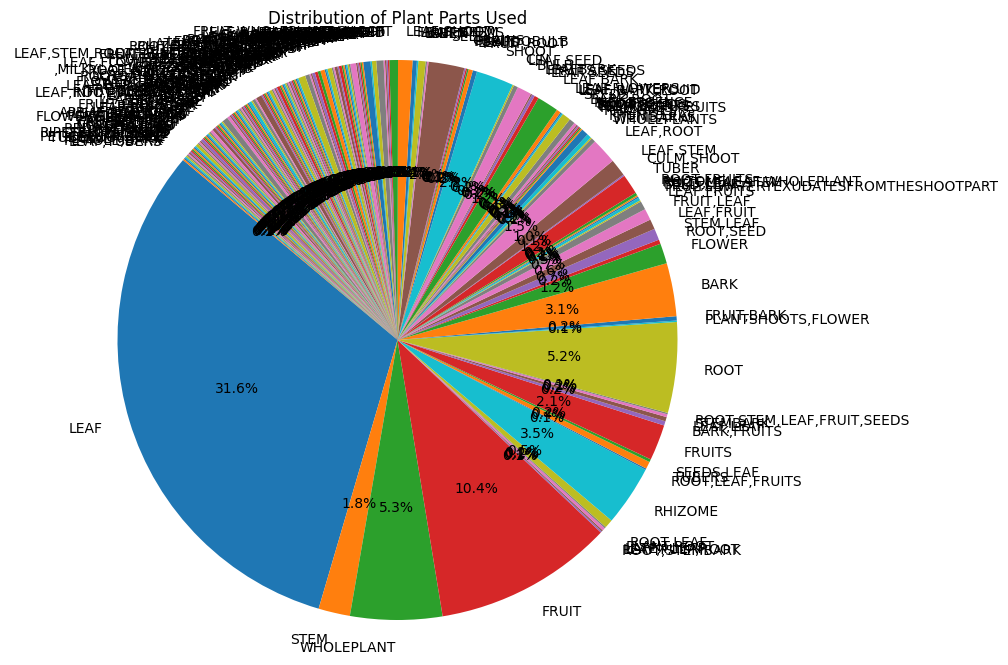

In [3]:

# 3. Pie Chart for Parts of Plants Used
parts_used_counts = Counter(df_modified['Partsused'].dropna())
parts, counts = zip(*parts_used_counts.items())

plt.figure(figsize=(10, 8))
plt.pie(counts, labels=parts, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Plant Parts Used')
plt.axis('equal')
# Save the figure
plt.savefig('plot3.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot3.png')

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

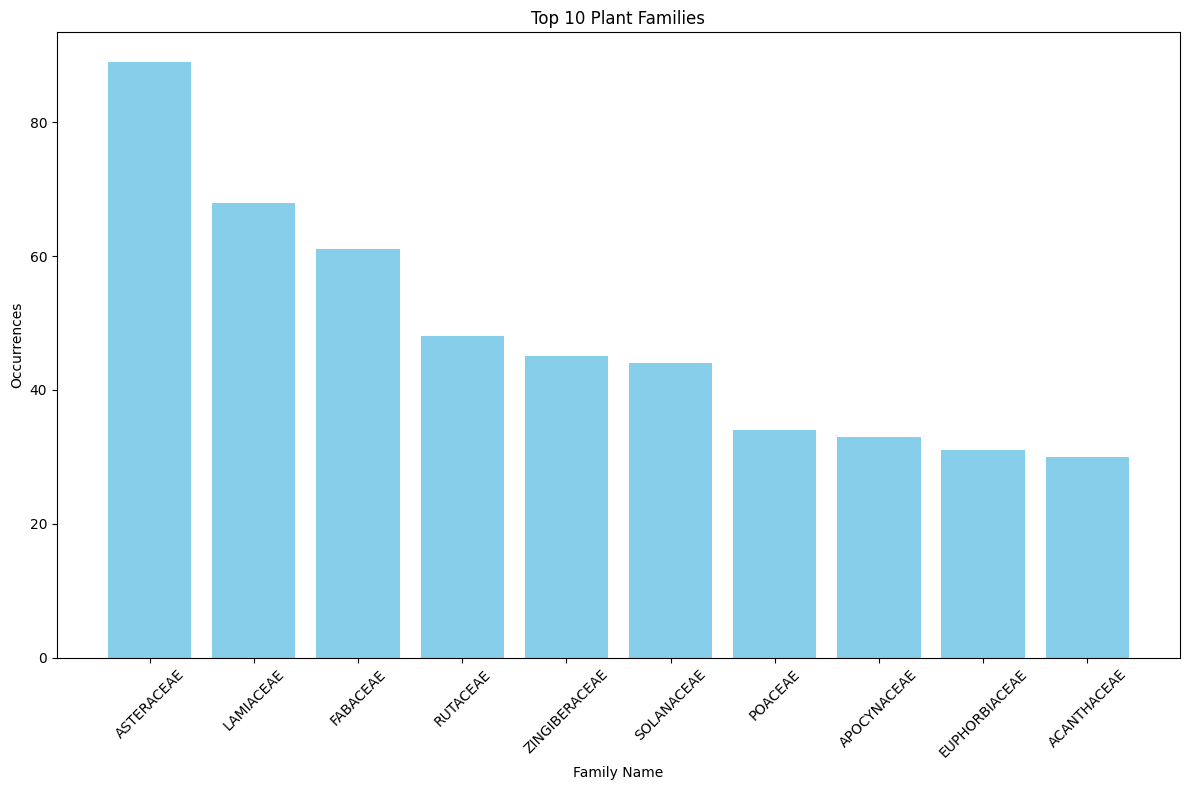

In [4]:

# 4. Bar Plot of Top 10 Plant Families
top_10_families = family_counts_corrected.most_common(10)
families, family_counts = zip(*top_10_families)

plt.figure(figsize=(12, 8))
plt.bar(families, family_counts, color='skyblue')
plt.xlabel('Family Name')
plt.ylabel('Occurrences')
plt.title('Top 10 Plant Families')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the figure
plt.savefig('plot4.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot4.png')

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

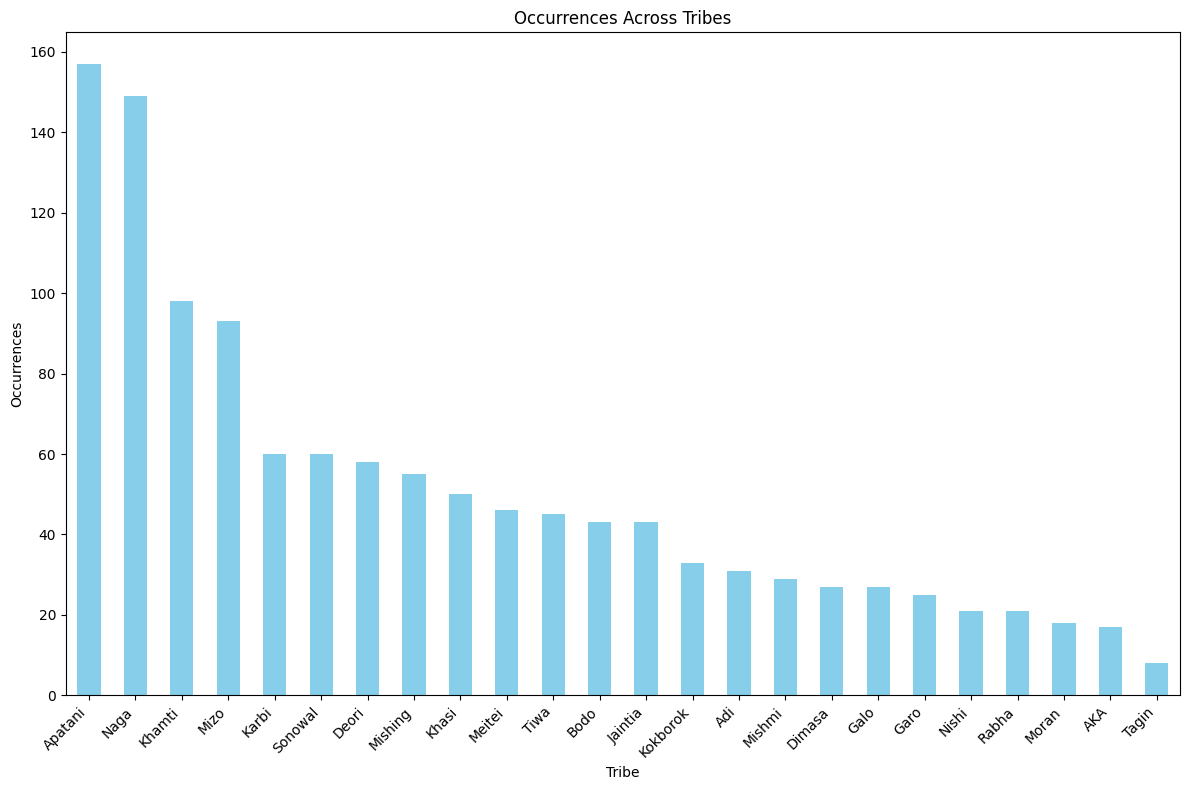

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_modified is your DataFrame and it contains a column 'Tribe'
# Count occurrences of each tribe
tribe_counts = df_modified['Tribe'].value_counts()

# Plotting the bar diagram for all tribes
plt.figure(figsize=(12, 8))
tribe_counts.plot(kind='bar', color='skyblue')
plt.title('Occurrences Across Tribes')
plt.xlabel('Tribe')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed
plt.tight_layout()  # Adjust layout for better fit of labels
# Save the figure
plt.savefig('plot5.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot5.png')

plt.show()


In [6]:
# To find the top 5 for each specified column, we'll count the occurrences of each value (taking into account multiple values in a single entry for some columns) and then select the top 5.
data = df_modified
# Function to calculate top 5 values in columns with simple values
def top_5_simple(column):
    return column.value_counts().head(5)

# Function to calculate top 5 in columns with multiple values separated by commas
def top_5_complex(column):
    # Splitting and flattening the list
    all_values = [
        val.strip()
        for sublist in column.dropna().str.split(',')
        for val in sublist if val.strip()
    ]
    return pd.Series(all_values).value_counts().head(5)

# Applying these functions to the specified columns
top_5_botanical_name = top_5_simple(data['Botanical Name'])
top_5_family_name = top_5_simple(data['Family Name'])
top_5_parts_used = top_5_complex(data['Partsused'])
top_5_disease = top_5_complex(data['Disease'])
top_5_system_acted_upon = top_5_complex(data['ActedUpon'])
top_5_tribe = top_5_simple(data['Tribe'])
top_5_state = top_5_simple(data['State'])

top_5_botanical_name, top_5_family_name, top_5_parts_used, top_5_disease, top_5_system_acted_upon, top_5_tribe, top_5_state


(Botanical Name
 HOUTTUYNIA CORDATA    14
 PSIDIUM GUAJAVA       12
 CENTELLA ASIATICA     12
 ALLIUM SATIVUM        11
 TERMINALIA CHEBULA    10
 Name: count, dtype: int64,
 Family Name
 ASTERACEAE       89
 LAMIACEAE        68
 FABACEAE         61
 RUTACEAE         48
 ZINGIBERACEAE    45
 Name: count, dtype: int64,
 LEAF          573
 FRUIT         175
 ROOT          133
 BARK           86
 WHOLEPLANT     78
 Name: count, dtype: int64,
 Dysentery      71
 Cough          40
 Fever          39
 Jaundice       37
 Indigestion    36
 Name: count, dtype: int64,
 DIGESTIVE        548
 INTEGUMENTARY    312
 CIRCULATORY      192
 RESPIRATORY      141
 NERVOUS          131
 Name: count, dtype: int64,
 Tribe
 Apatani    157
 Naga       149
 Khamti      98
 Mizo        93
 Karbi       60
 Name: count, dtype: int64,
 State
 Assam        465
 AP           335
 Nagaland     149
 Mizoram       93
 Meghalaya     93
 Name: count, dtype: int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

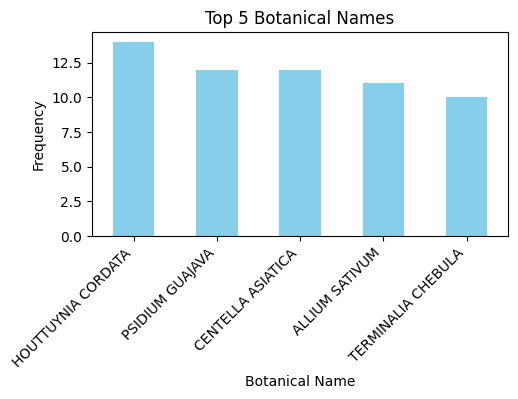

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

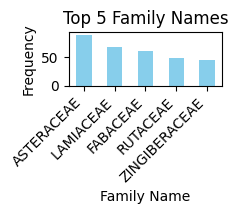

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

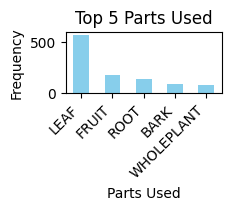

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

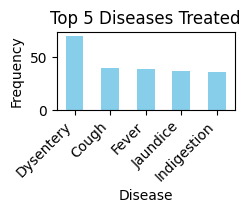

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

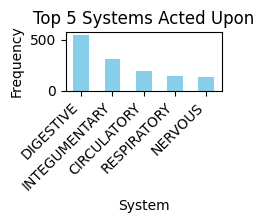

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

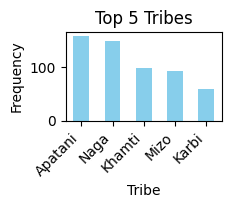

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

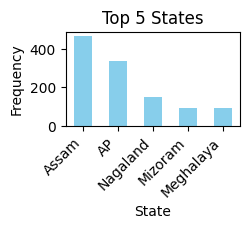

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

# Define a function to plot top 5 categories
def plot_top_5(data, title, xlabel, ylabel):
    data.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    # Save the figure
    plt.savefig(title + '.png', dpi=600, bbox_inches='tight')

    # Download the figure
    files.download(title + '.png') # Comment out this line if there is no files.download function

    plt.show()

# Plot for each category
plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
plot_top_5(top_5_botanical_name, "Top 5 Botanical Names", "Botanical Name", "Frequency")

plt.subplot(3, 3, 2)
plot_top_5(top_5_family_name, "Top 5 Family Names", "Family Name", "Frequency")

plt.subplot(3, 3, 3)
plot_top_5(top_5_parts_used, "Top 5 Parts Used", "Parts Used", "Frequency")

plt.subplot(3, 3, 4)
plot_top_5(top_5_disease, "Top 5 Diseases Treated", "Disease", "Frequency")

plt.subplot(3, 3, 5)
plot_top_5(top_5_system_acted_upon, "Top 5 Systems Acted Upon", "System", "Frequency")

plt.subplot(3, 3, 6)
plot_top_5(top_5_tribe, "Top 5 Tribes", "Tribe", "Frequency")

plt.subplot(3, 3, 7)
plot_top_5(top_5_state, "Top 5 States", "State", "Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
#files.download(title + '.png') #This line was causing the error. Corrected indentation and syntax

#plt.show() #This line was also causing the error. Removed as it's already called within the plot_top_5 function

In [11]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming df_modified is your DataFrame

# Define a function to perform Chi-Square Test and print results
def perform_chi_square_test(col1, col2, data_frame):
    contingency_table = pd.crosstab(data_frame[col1], data_frame[col2])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi-Square Statistic: {chi2}, p-value: {p}\n")

# Acted Upon + Tribe
perform_chi_square_test('ActedUpon', 'Tribe', df_modified)

# Acted Upon + Family Name
perform_chi_square_test('ActedUpon', 'Family Name', df_modified)

# Acted Upon + State
perform_chi_square_test('ActedUpon', 'State', df_modified)

# Acted Upon + State
perform_chi_square_test('Family Name', 'State', df_modified)

# Family Name + Tribe
perform_chi_square_test('Family Name', 'Tribe', df_modified)


Chi-Square Test between ActedUpon and Tribe:
Chi-Square Statistic: 7628.7127732518975, p-value: 9.385099806961614e-59

Chi-Square Test between ActedUpon and Family Name:
Chi-Square Statistic: 36671.593887740564, p-value: 0.9429524617638956

Chi-Square Test between ActedUpon and State:
Chi-Square Statistic: 2415.114264463453, p-value: 1.4754580231329072e-46

Chi-Square Test between Family Name and State:
Chi-Square Statistic: 1474.806723572142, p-value: 3.2763968828748093e-31

Chi-Square Test between Family Name and Tribe:
Chi-Square Statistic: 3279.2795034387345, p-value: 0.9642684519745788



In [12]:
# Filter for Asteraceae family and Integumentary system
asteraceae_integumentary = df_modified[(df_modified['Family Name'] == 'ASTERACEAE') & (df_modified['ActedUpon'].str.contains('INTEGUMENTARY'))]

# Count occurrences of specific plants within this filter
asteraceae_integumentary_counts = asteraceae_integumentary['Botanical Name'].value_counts()

print("Most correlated plants in Asteraceae family for Integumentary system:")
asteraceae_integumentary_counts.head()


Most correlated plants in Asteraceae family for Integumentary system:


,count
Botanical Name,
AGERATUM CONYZOIDES,9
ECLIPTA PROSTRATA,3
CHROMOLAENA ODORATA,3
SPILANTHES PANICULATA,3
CRASSOCEPHALUM CREPIDIOIDES,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

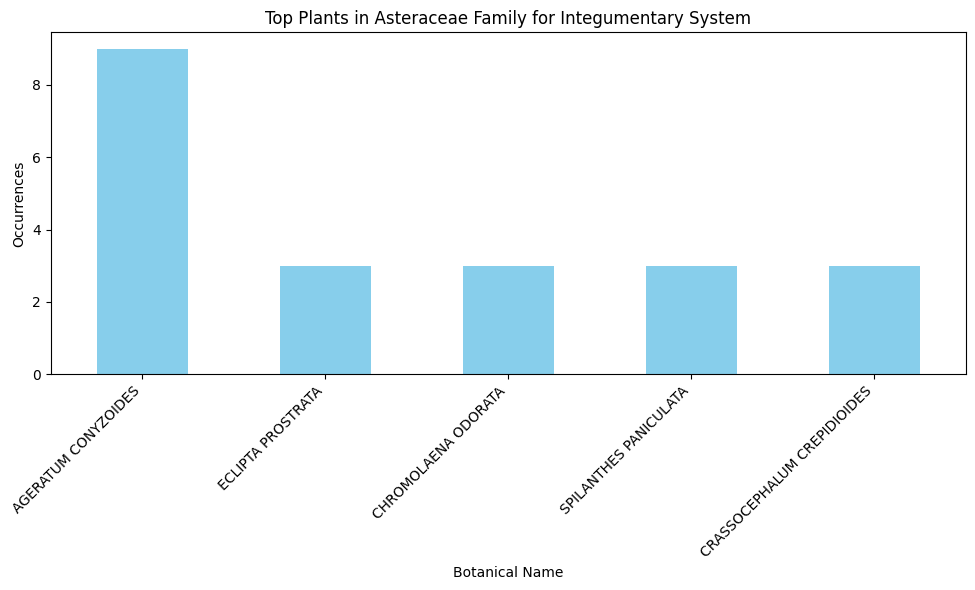

In [14]:
# Assuming asteraceae_integumentary_counts contains the value counts
plt.figure(figsize=(10, 6))
asteraceae_integumentary_counts.head().plot(kind='bar', color='skyblue')
plt.title('Top Plants in Asteraceae Family for Integumentary System')
plt.xlabel('Botanical Name')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the figure
plt.savefig('Asteraceae Family for Integumentary System.png', dpi=300, bbox_inches='tight')

# Download the figure
files.download('Asteraceae Family for Integumentary System.png')

plt.show()


In [15]:
# Filter for Rutaceae family and Digestive system
rutaceae_digestive = df_modified[(df_modified['Family Name'] == 'RUTACEAE') & (df_modified['ActedUpon'].str.contains('DIGESTIVE'))]

# Count occurrences of specific plants within this filter
rutaceae_digestive_counts = rutaceae_digestive['Botanical Name'].value_counts()

print("Most correlated plants in Rutaceae family for Digestive system:")
print(rutaceae_digestive_counts.head())


Most correlated plants in Rutaceae family for Digestive system:
Botanical Name
AEGLE MARMELOS            6
MURRAYA KOENIGII          5
CITRUS LIMON              3
ZANTHOXYLUM OXYPHYLLUM    3
ZANTHOXYLUM ARMATUM       2
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

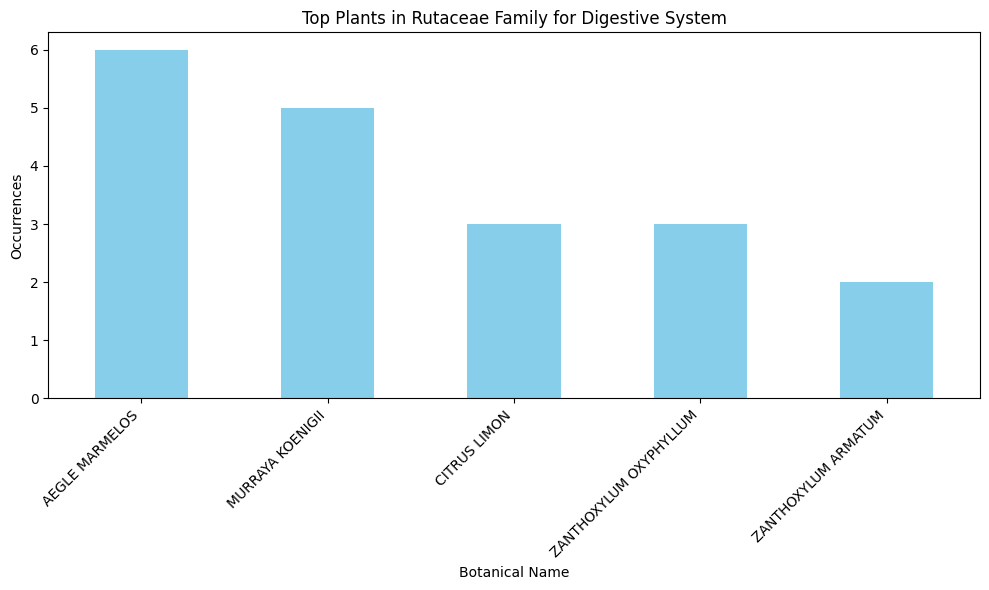

In [17]:
# Assuming rutaceae_digestive_counts contains the value counts
plt.figure(figsize=(10, 6))
rutaceae_digestive_counts.head().plot(kind='bar', color='skyblue')
plt.title('Top Plants in Rutaceae Family for Digestive System')
plt.xlabel('Botanical Name')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the figure
plt.savefig('plot6.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot6.png')

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

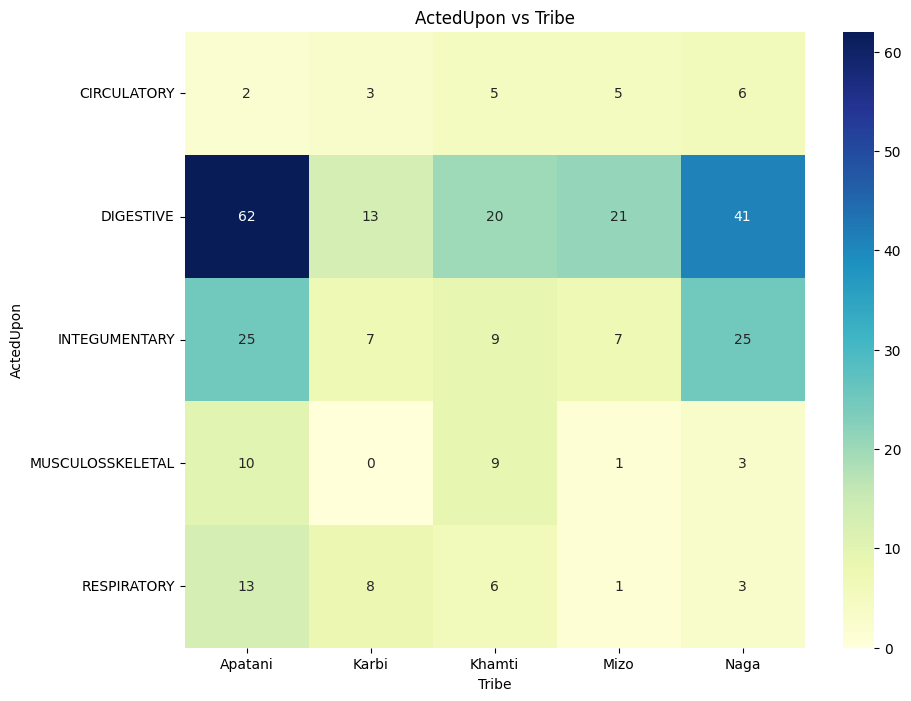

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

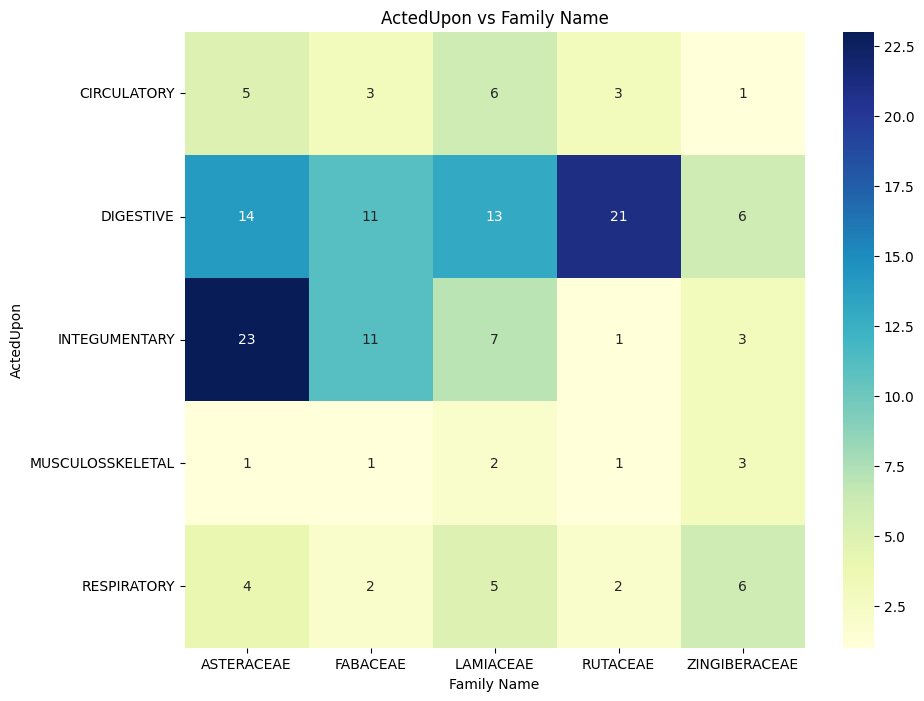

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

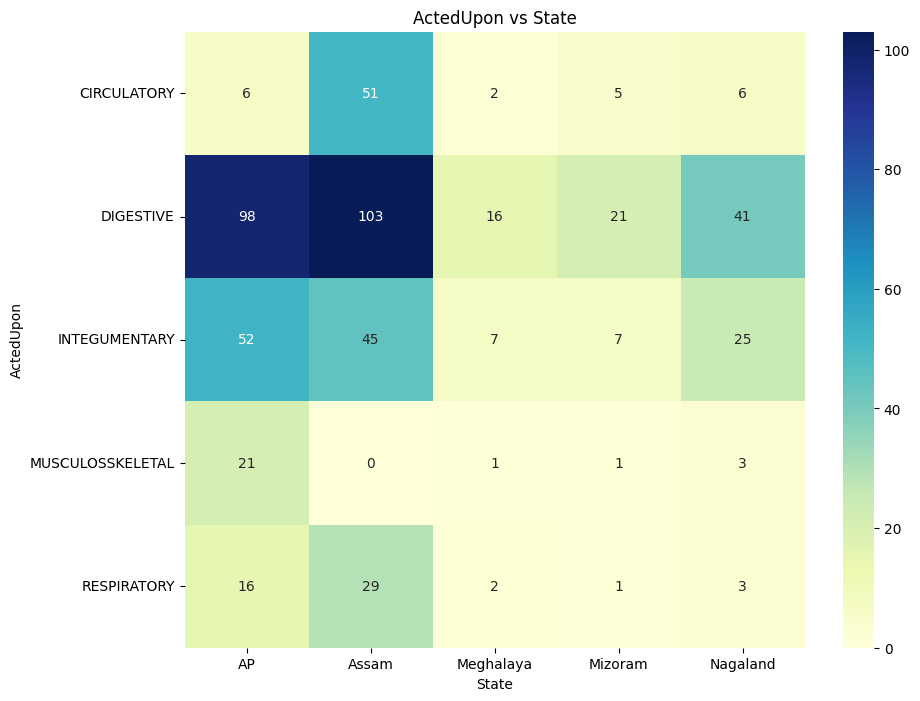

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

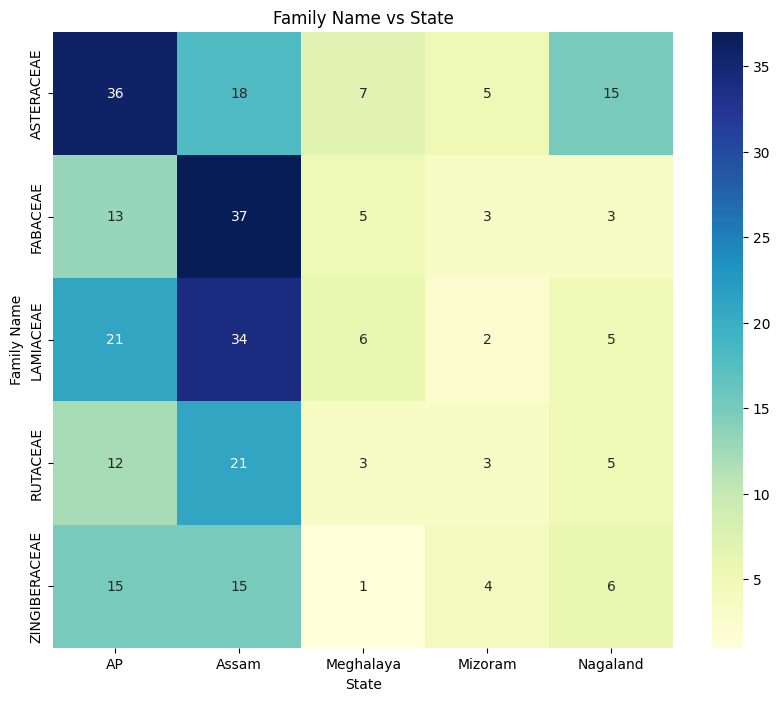

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

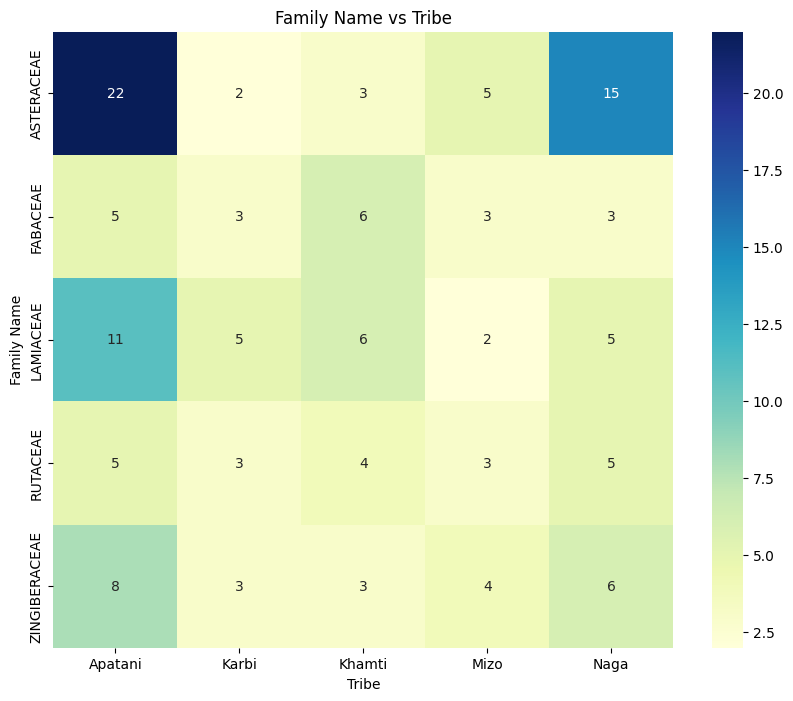

In [20]:
import seaborn as sns

# Function to create a contingency table for top categories and plot heatmap for correlations
def plot_heatmap_for_top_correlation(column1, column2, title):
    # Creating contingency table for the top categories in both columns
    top_categories_1 = column1.value_counts().index[:5]
    top_categories_2 = column2.value_counts().index[:5]

    # Filter data for only top categories to make the table more relevant
    filtered_data = data[data[column1.name].isin(top_categories_1) & data[column2.name].isin(top_categories_2)]

    # Creating contingency table
    contingency_table = pd.crosstab(filtered_data[column1.name], filtered_data[column2.name])

    # Plotting heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
    plt.title(title)
    plt.xlabel(column2.name)
    plt.ylabel(column1.name)
    # Save the figure
    plt.savefig(title + '.png', dpi=600, bbox_inches='tight')

# Download the figure
    files.download(title + '.png')

    plt.show()

# Plotting heatmaps for each pair based on the given Chi-Square tests
plot_heatmap_for_top_correlation(data['ActedUpon'], data['Tribe'], "ActedUpon vs Tribe")
plot_heatmap_for_top_correlation(data['ActedUpon'], data['Family Name'], "ActedUpon vs Family Name")
plot_heatmap_for_top_correlation(data['ActedUpon'], data['State'], "ActedUpon vs State")
plot_heatmap_for_top_correlation(data['Family Name'], data['State'], "Family Name vs State")
plot_heatmap_for_top_correlation(data['Family Name'], data['Tribe'], "Family Name vs Tribe")


In [21]:
# To normalize the contingency tables, we'll convert the counts to proportions of the total counts in the table.
# This will help us identify the most correlated entries based on their relative significance, not just absolute counts.

# Function to create a normalized contingency table and find the most relatively correlated entry
def find_most_correlated_entry_normalized(column1, column2):
    top_categories_1 = column1.value_counts().index[:5]
    top_categories_2 = column2.value_counts().index[:5]
    filtered_data = data[data[column1.name].isin(top_categories_1) & data[column2.name].isin(top_categories_2)]
    contingency_table = pd.crosstab(filtered_data[column1.name], filtered_data[column2.name], normalize='all')
    # Find the highest proportion in the contingency table
    max_proportion = contingency_table.max().max()
    most_correlated_normalized = contingency_table.stack()[contingency_table.stack() == max_proportion]
    return most_correlated_normalized

# Finding the most correlated entries for each pair with normalization
most_correlated_normalized_acted_upon_tribe = find_most_correlated_entry_normalized(data['ActedUpon'], data['Tribe'])
most_correlated_normalized_acted_upon_family_name = find_most_correlated_entry_normalized(data['ActedUpon'], data['Family Name'])
most_correlated_normalized_acted_upon_state = find_most_correlated_entry_normalized(data['ActedUpon'], data['State'])
most_correlated_normalized_family_name_state = find_most_correlated_entry_normalized(data['Family Name'], data['State'])
most_correlated_normalized_family_name_tribe = find_most_correlated_entry_normalized(data['Family Name'], data['Tribe'])

most_correlated_normalized_acted_upon_tribe, most_correlated_normalized_acted_upon_family_name, most_correlated_normalized_acted_upon_state, most_correlated_normalized_family_name_state, most_correlated_normalized_family_name_tribe


(ActedUpon  Tribe  
 DIGESTIVE  Apatani    0.203279
 dtype: float64,
 ActedUpon      Family Name
 INTEGUMENTARY  ASTERACEAE     0.148387
 dtype: float64,
 ActedUpon  State
 DIGESTIVE  Assam    0.183274
 dtype: float64,
 Family Name  State
 FABACEAE     Assam    0.125424
 dtype: float64,
 Family Name  Tribe  
 ASTERACEAE   Apatani    0.157143
 dtype: float64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

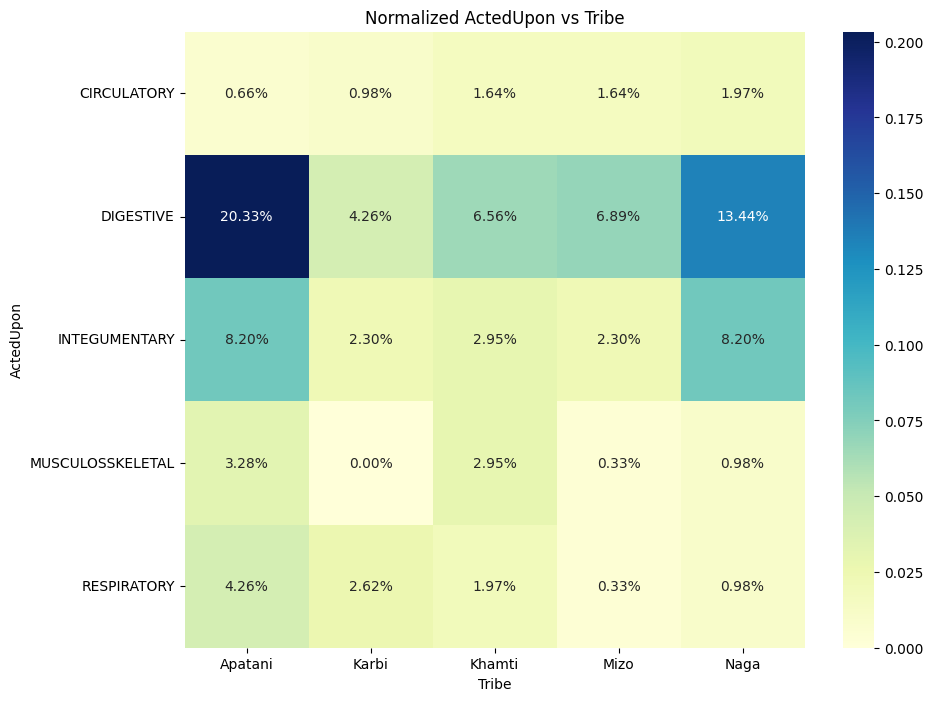

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

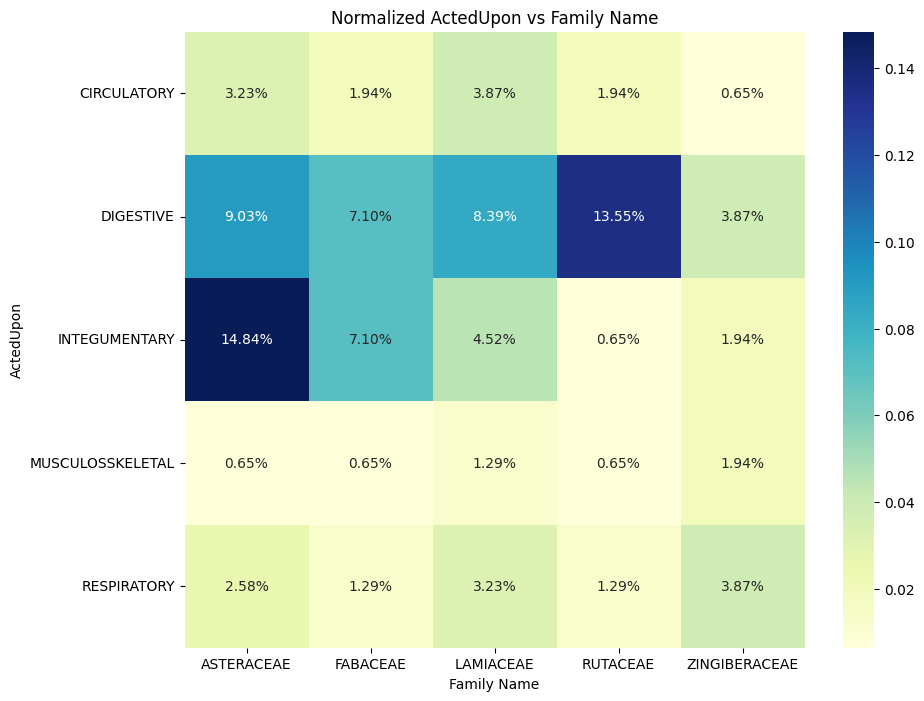

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

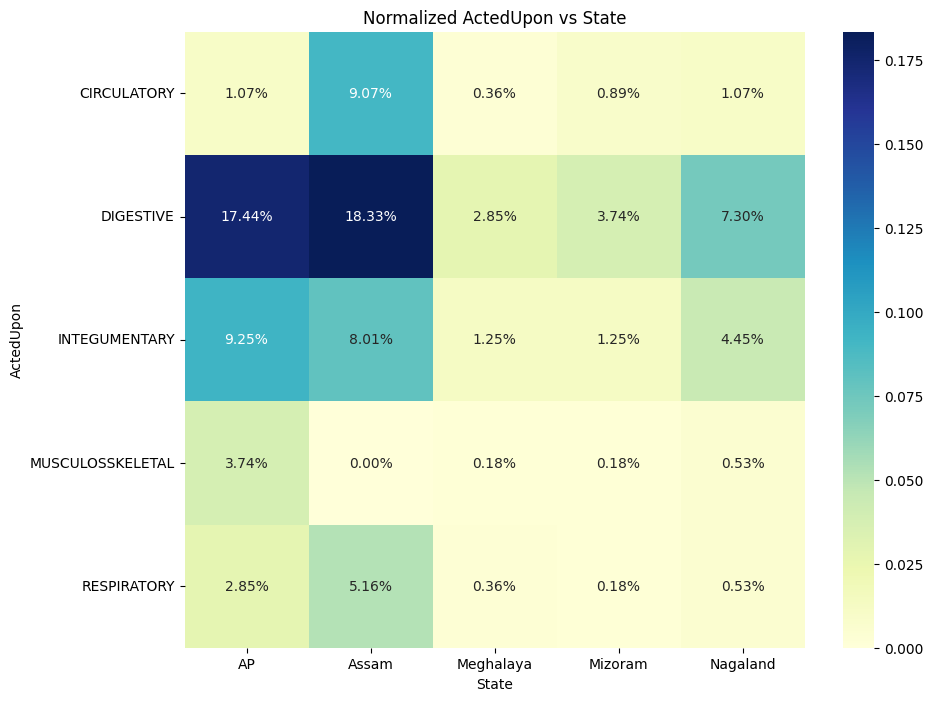

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

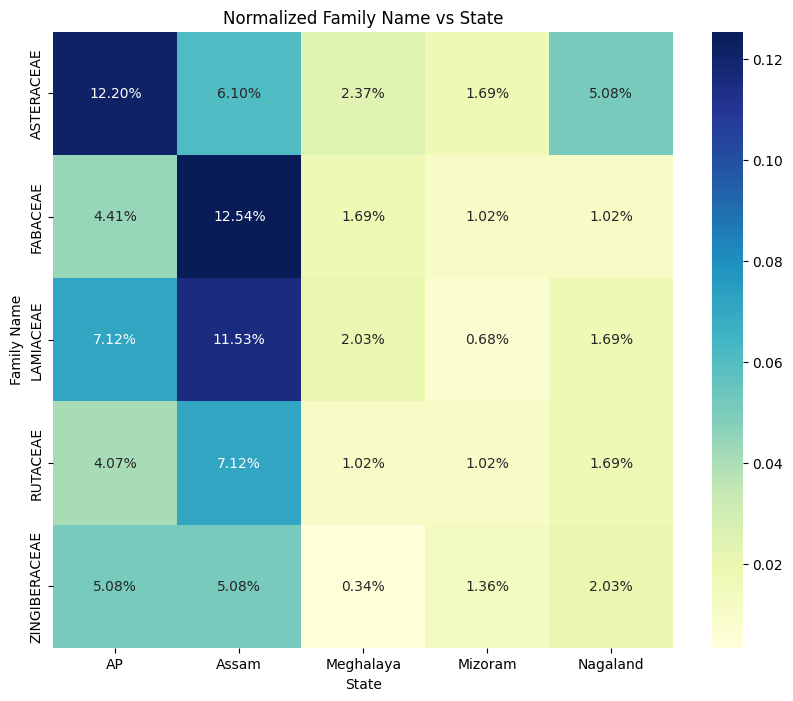

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

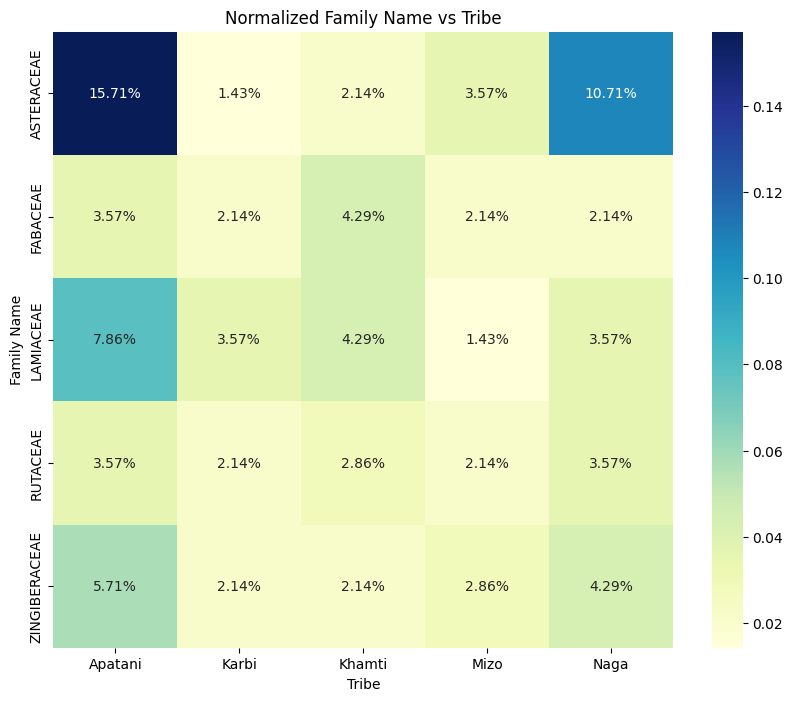

In [23]:
# To create heatmaps based on the normalized contingency tables for each pair, we'll recreate the contingency tables with normalization and then plot them.

# Function to create a normalized contingency table and plot heatmap
def plot_normalized_heatmap(column1, column2, title):
    top_categories_1 = column1.value_counts().index[:5]
    top_categories_2 = column2.value_counts().index[:5]
    filtered_data = data[data[column1.name].isin(top_categories_1) & data[column2.name].isin(top_categories_2)]
    contingency_table_normalized = pd.crosstab(filtered_data[column1.name], filtered_data[column2.name], normalize='all')

    # Plotting heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(contingency_table_normalized, annot=True, cmap="YlGnBu", fmt=".2%")
    plt.title(title)
    plt.xlabel(column2.name)
    plt.ylabel(column1.name)
    plt.savefig(title+'.png', dpi=600, bbox_inches='tight')

# Download the figure
    files.download(title+'.png')
    plt.show()

# Plotting normalized heatmaps for each pair
plot_normalized_heatmap(data['ActedUpon'], data['Tribe'], "Normalized ActedUpon vs Tribe")
plot_normalized_heatmap(data['ActedUpon'], data['Family Name'], "Normalized ActedUpon vs Family Name")
plot_normalized_heatmap(data['ActedUpon'], data['State'], "Normalized ActedUpon vs State")
plot_normalized_heatmap(data['Family Name'], data['State'], "Normalized Family Name vs State")
plot_normalized_heatmap(data['Family Name'], data['Tribe'], "Normalized Family Name vs Tribe")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

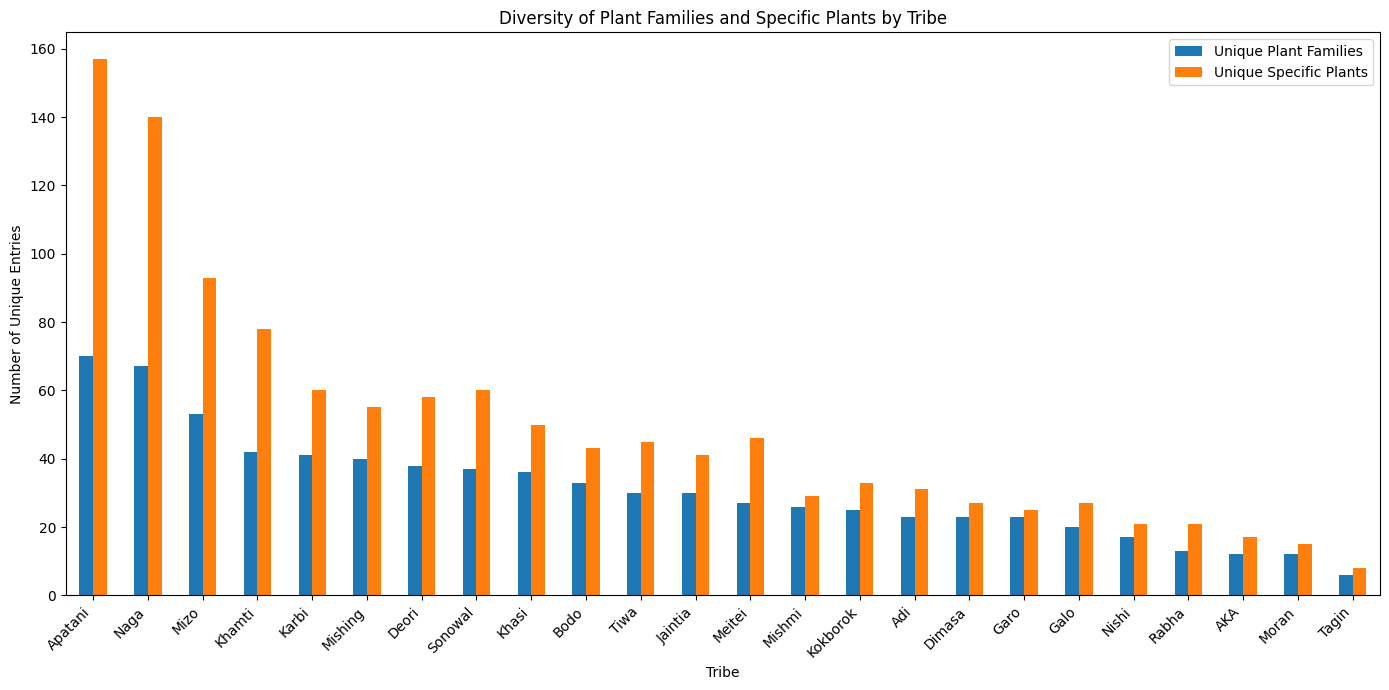

In [24]:
# To find out which tribe has the highest diversity of plant families and specific plants,
# we'll calculate the number of unique plant families and specific plants (Botanical Name) associated with each tribe.
# We'll adjust for the unequal distribution of tribes by considering the unique counts rather than total counts.

# Calculating the number of unique plant families and specific plants for each tribe
unique_plant_families_per_tribe = data.groupby('Tribe')['Family Name'].nunique()
unique_specific_plants_per_tribe = data.groupby('Tribe')['Botanical Name'].nunique()

# Combining the two Series into a DataFrame for plotting
diversity_per_tribe = pd.DataFrame({
    'Unique Plant Families': unique_plant_families_per_tribe,
    'Unique Specific Plants': unique_specific_plants_per_tribe
}).reset_index()

# Sorting the DataFrame by one of the diversity measures to highlight the tribes with the highest diversity
diversity_per_tribe_sorted = diversity_per_tribe.sort_values(by='Unique Plant Families', ascending=False)

# Plotting the joint bar plot
plt.figure(figsize=(12, 8))
diversity_per_tribe_sorted.plot(x='Tribe', kind='bar', stacked=False, figsize=(14, 7))
plt.title('Diversity of Plant Families and Specific Plants by Tribe')
plt.ylabel('Number of Unique Entries')
plt.xlabel('Tribe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot7.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot7.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x800 with 0 Axes>

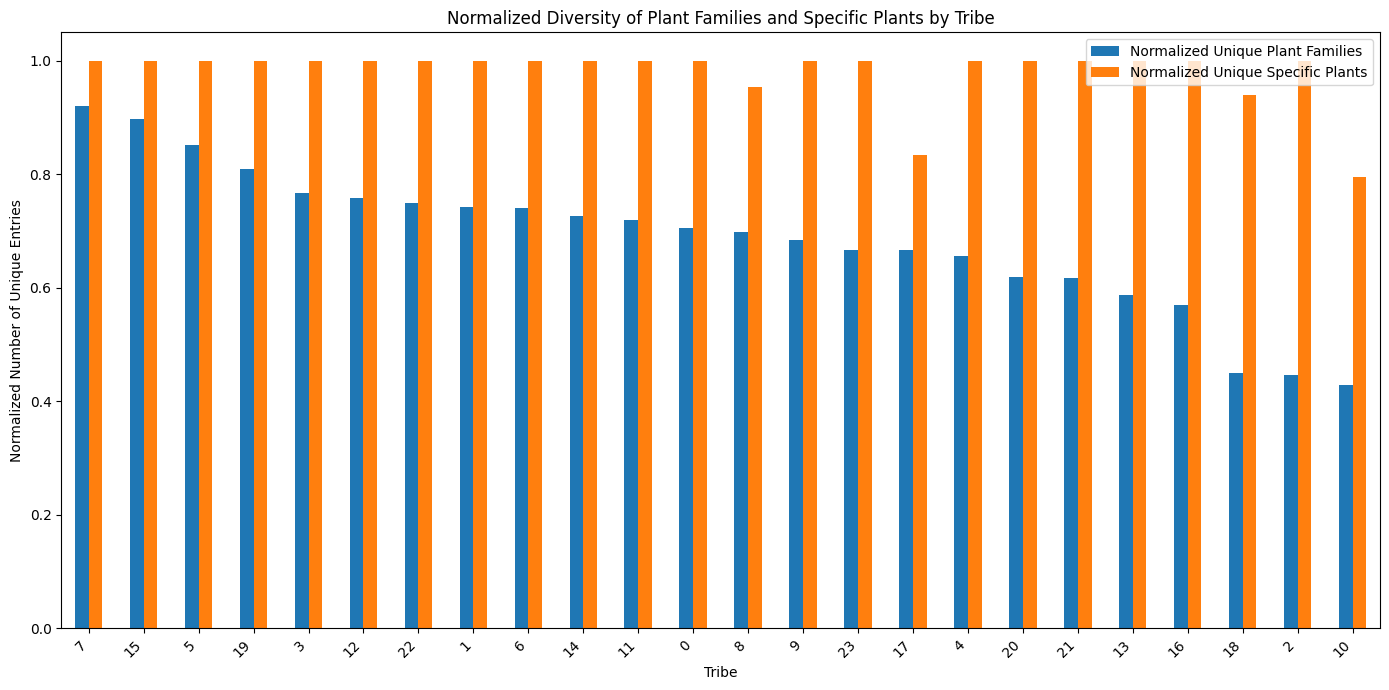

In [25]:
# It seems there was an issue with using 'Tribe' as the index column name. Let's correct this and plot again.

# Correcting the DataFrame by setting 'Tribe' as index for normalization calculations
total_entries_per_tribe = data['Tribe'].value_counts()

# Normalizing unique counts by total entries
normalized_unique_plant_families_per_tribe = unique_plant_families_per_tribe / total_entries_per_tribe
normalized_unique_specific_plants_per_tribe = unique_specific_plants_per_tribe / total_entries_per_tribe

# Combining the normalized Series into a DataFrame for plotting
normalized_diversity_per_tribe = pd.DataFrame({
    'Normalized Unique Plant Families': normalized_unique_plant_families_per_tribe,
    'Normalized Unique Specific Plants': normalized_unique_specific_plants_per_tribe
}).reset_index()

# Making sure the index is named correctly for plotting
normalized_diversity_per_tribe['Tribe'] = normalized_diversity_per_tribe.index

# Sorting the DataFrame by one of the normalized diversity measures for better visualization
normalized_diversity_per_tribe_sorted = normalized_diversity_per_tribe.sort_values(by='Normalized Unique Plant Families', ascending=False)

# Plotting the joint bar plot with normalized values
plt.figure(figsize=(14, 8))
normalized_diversity_per_tribe_sorted.plot(x='Tribe', kind='bar', figsize=(14, 7))
plt.title('Normalized Diversity of Plant Families and Specific Plants by Tribe')
plt.ylabel('Normalized Number of Unique Entries')
plt.xlabel('Tribe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot8.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot8.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x700 with 0 Axes>

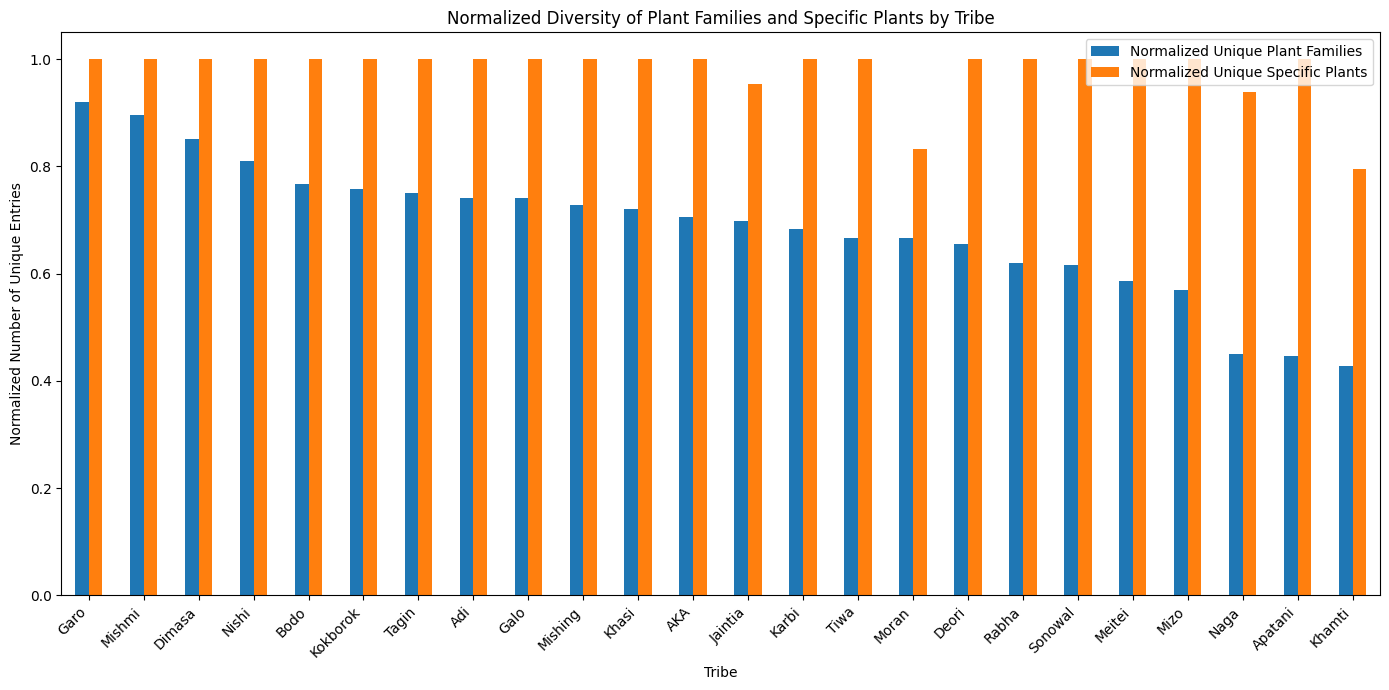

In [26]:
# Assuming 'unique_plant_families_per_tribe' and 'unique_specific_plants_per_tribe' are Series with 'Tribe' as index.

# Make sure these Series are properly named for clarity in operations
unique_plant_families_per_tribe.name = 'Unique Plant Families'
unique_specific_plants_per_tribe.name = 'Unique Specific Plants'

# Normalize the counts directly
normalized_unique_plant_families_per_tribe = unique_plant_families_per_tribe / total_entries_per_tribe
normalized_unique_specific_plants_per_tribe = unique_specific_plants_per_tribe / total_entries_per_tribe

# Creating a DataFrame from the normalized Series
normalized_diversity_per_tribe = pd.DataFrame({
    'Normalized Unique Plant Families': normalized_unique_plant_families_per_tribe,
    'Normalized Unique Specific Plants': normalized_unique_specific_plants_per_tribe
})

# Ensure the DataFrame has 'Tribe' as its index for plotting
normalized_diversity_per_tribe.index.name = 'Tribe'

# Sorting for visualization
normalized_diversity_per_tribe_sorted = normalized_diversity_per_tribe.sort_values(by='Normalized Unique Plant Families', ascending=False)

# Plotting
plt.figure(figsize=(14, 7))
normalized_diversity_per_tribe_sorted.plot(kind='bar', figsize=(14, 7))
plt.title('Normalized Diversity of Plant Families and Specific Plants by Tribe')
plt.ylabel('Normalized Number of Unique Entries')
plt.xlabel('Tribe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot9.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot9.png')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x800 with 0 Axes>

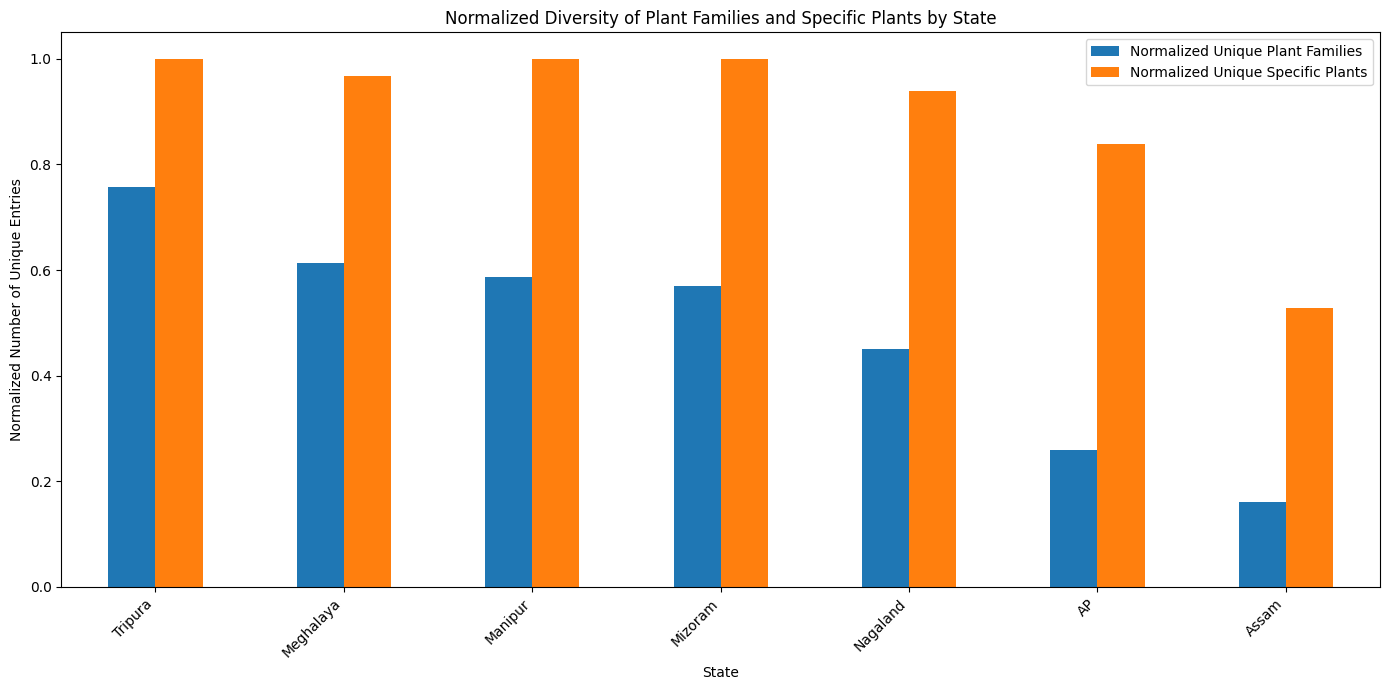

In [27]:
# Calculating the number of unique plant families and specific plants associated with each state
unique_plant_families_per_state = data.groupby('State')['Family Name'].nunique()
unique_specific_plants_per_state = data.groupby('State')['Botanical Name'].nunique()

# Calculating total entries for each state to use for normalization
total_entries_per_state = data['State'].value_counts()

# Normalizing unique counts by total entries for states
normalized_unique_plant_families_per_state = unique_plant_families_per_state / total_entries_per_state
normalized_unique_specific_plants_per_state = unique_specific_plants_per_state / total_entries_per_state

# Combining the normalized Series into a DataFrame for plotting
normalized_diversity_per_state = pd.DataFrame({
    'Normalized Unique Plant Families': normalized_unique_plant_families_per_state,
    'Normalized Unique Specific Plants': normalized_unique_specific_plants_per_state
})

# Making sure the index is named correctly for plotting
normalized_diversity_per_state['State'] = normalized_diversity_per_state.index

# Sorting the DataFrame by one of the normalized diversity measures for better visualization
normalized_diversity_per_state_sorted = normalized_diversity_per_state.sort_values(by='Normalized Unique Plant Families', ascending=False)

# Plotting the joint bar plot with normalized values for states
plt.figure(figsize=(14, 8))
normalized_diversity_per_state_sorted.plot(x='State', kind='bar', figsize=(14, 7))
plt.title('Normalized Diversity of Plant Families and Specific Plants by State')
plt.ylabel('Normalized Number of Unique Entries')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plot10.png', dpi=600, bbox_inches='tight')

# Download the figure
files.download('plot10.png')
plt.show()


In [28]:
import pandas as pd
from scipy.stats import entropy
import numpy as np

# Assuming 'data' is your DataFrame with columns including 'Tribe', 'State', and 'Botanical Name'

def simpsons_diversity_index(counts):
    n = np.sum(counts)
    if n == 0:
        return 0
    simpson_index = 1 - np.sum((counts / n) ** 2)
    return simpson_index

def shannons_diversity_index(counts):
    proportions = counts / np.sum(counts)
    shannon_index = entropy(proportions, base=np.e)
    return shannon_index

def calculate_diversity_indices(grouped_data):
    diversity_indices = {}
    for name, group in grouped_data:
        counts = group.values
        simpson_index = simpsons_diversity_index(counts)
        shannon_index = shannons_diversity_index(counts)
        diversity_indices[name] = {'Simpson Index': simpson_index, 'Shannon Index': shannon_index}
    return pd.DataFrame.from_dict(diversity_indices, orient='index').reset_index()

# Grouping the data by Tribe and State to calculate the diversity indices
grouped_by_tribe = data.groupby('Tribe')['Botanical Name'].value_counts()
grouped_by_state = data.groupby('State')['Botanical Name'].value_counts()

# Calculating diversity indices for each tribe
tribe_diversity_indices = calculate_diversity_indices(grouped_by_tribe.groupby(level=0))
tribe_diversity_indices.columns = ['Tribe', 'Simpson Index', 'Shannon Index']

# Calculating diversity indices for each state
state_diversity_indices = calculate_diversity_indices(grouped_by_state.groupby(level=0))
state_diversity_indices.columns = ['State', 'Simpson Index', 'Shannon Index']

# Displaying the results
print("Diversity Indices for Tribes:")
print(tribe_diversity_indices)
print("\nDiversity Indices for States:")
print(state_diversity_indices)


Diversity Indices for Tribes:
       Tribe  Simpson Index  Shannon Index
0        AKA       0.941176       2.833213
1        Adi       0.967742       3.433987
2    Apatani       0.993631       5.056246
3       Bodo       0.976744       3.761200
4      Deori       0.982759       4.060443
5     Dimasa       0.962963       3.295837
6       Galo       0.962963       3.295837
7       Garo       0.960000       3.218876
8    Jaintia       0.973499       3.684553
9      Karbi       0.983333       4.094345
10    Khamti       0.984590       4.275354
11     Khasi       0.980000       3.912023
12  Kokborok       0.969697       3.496508
13    Meitei       0.978261       3.828641
14   Mishing       0.981818       4.007333
15    Mishmi       0.965517       3.367296
16      Mizo       0.989247       4.532599
17     Moran       0.925926       2.659323
18      Naga       0.992478       4.920210
19     Nishi       0.952381       3.044522
20     Rabha       0.952381       3.044522
21   Sonowal       0.983

In [29]:
tribe_diversity_indices.to_csv('/content/tribe_diversity_indices.csv')
files.download('tribe_diversity_indices.csv')
state_diversity_indices.to_csv('/content/state_diversity_indices.csv')
files.download('state_diversity_indices.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>